In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [136]:
data = pd.read_csv('..//dataset//dataset.csv')

In [137]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [138]:
data.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [139]:
for col in data.columns:
    data[col] = data[col].str.replace('_',' ')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
data.fillna(value='missing', inplace=True)
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
3,Fungal infection,itching,skin rash,dischromic patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4,Fungal infection,itching,skin rash,nodal skin eruptions,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning movements,loss of balance,unsteadiness,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4917,Urinary tract infection,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4918,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing


In [141]:
y = data.drop('Disease', axis=1)

In [142]:
symptoms = []

for col in data.columns[1:]:
    symptoms.append(data[col].unique())

In [143]:
unique_symp = []

for row in symptoms:
    for symp in row:
        if (symp not in unique_symp) and (symp is not np.nan):
            unique_symp.append(symp.strip())

In [144]:
unique_symp

['itching',
 'skin rash',
 'continuous sneezing',
 'shivering',
 'stomach pain',
 'acidity',
 'vomiting',
 'indigestion',
 'muscle wasting',
 'patches in throat',
 'fatigue',
 'weight loss',
 'sunken eyes',
 'cough',
 'headache',
 'chest pain',
 'back pain',
 'weakness in limbs',
 'chills',
 'joint pain',
 'yellowish skin',
 'constipation',
 'pain during bowel movements',
 'breathlessness',
 'cramps',
 'weight gain',
 'mood swings',
 'neck pain',
 'muscle weakness',
 'stiff neck',
 'pus filled pimples',
 'burning micturition',
 'bladder discomfort',
 'high fever',
 'skin rash',
 'nodal skin eruptions',
 'shivering',
 'chills',
 'acidity',
 'ulcers on tongue',
 'vomiting',
 'yellowish skin',
 'stomach pain',
 'loss of appetite',
 'indigestion',
 'patches in throat',
 'high fever',
 'weight loss',
 'restlessness',
 'sunken eyes',
 'dehydration',
 'cough',
 'chest pain',
 'dizziness',
 'headache',
 'weakness in limbs',
 'neck pain',
 'weakness of one body side',
 'fatigue',
 'joint pain',

In [145]:
len(unique_symp)

395

In [146]:
values = [0.0] * len(unique_symp)
symp_dict = dict(zip(unique_symp, values))

In [147]:
encoded = []

for i in range(len(data)):
    row = data.iloc[i].values
    temp = dict(zip(unique_symp, values))

    for i in range(1,len(row)):
        if row[i] is not np.nan:
            temp[row[i].strip()] = 1.0

    encoded.append(temp)

In [148]:
pre_process = pd.DataFrame(data=encoded)
pre_process['disease'] = data['Disease']
pre_process.fillna(value=0,inplace=True)
pre_process

,itching,skin rash,continuous sneezing,shivering,stomach pain,acidity,vomiting,indigestion,muscle wasting,patches in throat,...,receiving unsterile injections,coma,sinus pressure,palpitations,stomach bleeding,runny nose,congestion,blood in sputum,loss of smell,disease
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(vertigo) Paroymsal Positional Vertigo
4916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Acne
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Urinary tract infection
4918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Psoriasis


In [149]:
pre_process.describe()

,itching,skin rash,continuous sneezing,shivering,stomach pain,acidity,vomiting,indigestion,muscle wasting,patches in throat,...,abnormal menstruation,receiving unsterile injections,coma,sinus pressure,palpitations,stomach bleeding,runny nose,congestion,blood in sputum,loss of smell
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.045122,0.021951,0.045122,0.045122,0.389024,0.045122,0.021951,0.021951,...,0.048780,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390
std,0.344730,0.366417,0.207593,0.146539,0.207593,0.207593,0.487578,0.207593,0.146539,0.146539,...,0.215431,0.154273,0.154273,0.154273,0.154273,0.154273,0.154273,0.154273,0.154273,0.154273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
pre_process

,itching,skin rash,continuous sneezing,shivering,stomach pain,acidity,vomiting,indigestion,muscle wasting,patches in throat,...,receiving unsterile injections,coma,sinus pressure,palpitations,stomach bleeding,runny nose,congestion,blood in sputum,loss of smell,disease
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(vertigo) Paroymsal Positional Vertigo
4916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Acne
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Urinary tract infection
4918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Psoriasis


In [151]:
features  = pre_process.iloc[:,0:-1]
target = pre_process['disease']

In [152]:
count = []
for col in features.columns:
    count.append(sum(features[col]))

In [153]:
count.sort()
print(count)
print(len(count))

[102.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 216.0, 222.0, 222.0, 222.0, 222.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 234.0, 234.0, 234.0, 234.0, 240.0, 336.0, 342.0, 342.0, 348.0, 354.0, 354.0, 450.0, 456.0, 456.0, 462.0, 474.0, 474.0, 564.0, 564.0, 570.0, 678.0, 678.0, 684.0, 696.0, 702.0, 786.0, 798.0, 816.0, 912.0, 1032.0, 1134.0, 1146.0, 1152.0, 1362.0, 1914.0, 1932.0, 4848.0]
132


In [154]:
from scipy.stats import pearsonr
correlation = []
for i in range(len(features.columns)):
    for j in range(i+1,len(features.columns)):
        correlation.append((pearsonr(features[features.columns[i]], features[features.columns[j]]) , i, j))

In [155]:
correlation.sort(reverse=True)

In [156]:
correlation

[((0.9999999999999634, 0.0), 115, 126),
 ((0.9999999999999631, 0.0), 108, 114),
 ((0.9999999999999631, 0.0), 105, 114),
 ((0.9999999999999631, 0.0), 105, 108),
 ((0.9999999999999625, 0.0), 129, 131),
 ((0.9999999999999625, 0.0), 128, 131),
 ((0.9999999999999625, 0.0), 128, 129),
 ((0.9999999999999625, 0.0), 125, 131),
 ((0.9999999999999625, 0.0), 125, 129),
 ((0.9999999999999625, 0.0), 125, 128),
 ((0.9999999999999625, 0.0), 120, 131),
 ((0.9999999999999625, 0.0), 120, 129),
 ((0.9999999999999625, 0.0), 120, 128),
 ((0.9999999999999625, 0.0), 120, 125),
 ((0.9999999999999625, 0.0), 113, 131),
 ((0.9999999999999625, 0.0), 113, 129),
 ((0.9999999999999625, 0.0), 113, 128),
 ((0.9999999999999625, 0.0), 113, 125),
 ((0.9999999999999625, 0.0), 113, 120),
 ((0.9999999999999623, 0.0), 124, 127),
 ((0.9999999999999623, 0.0), 118, 123),
 ((0.9999999999999596, 0.0), 106, 110),
 ((0.9740708303413022, 0.0), 109, 126),
 ((0.9740708303413022, 0.0), 109, 115),
 ((0.9740708303413022, 0.0), 25, 114),
 

In [157]:
corr = features.corr()

In [158]:
corr.head(10)

,itching,skin rash,continuous sneezing,shivering,stomach pain,acidity,vomiting,indigestion,muscle wasting,patches in throat,...,abnormal menstruation,receiving unsterile injections,coma,sinus pressure,palpitations,stomach bleeding,runny nose,congestion,blood in sputum,loss of smell
itching,1.000000,0.318158,-0.086906,-0.059893,0.202850,-0.086906,-0.057763,-0.086906,-0.059893,-0.059893,...,-0.090534,0.372559,-0.063212,-0.063212,-0.063212,-0.063212,-0.063212,-0.063212,-0.063212,-0.063212
skin rash,0.318158,1.000000,-0.094786,-0.065324,0.161784,-0.094786,-0.225046,-0.094786,-0.065324,-0.065324,...,-0.098744,-0.068944,-0.068944,-0.068944,-0.068944,-0.068944,-0.068944,-0.068944,-0.068944,-0.068944
continuous sneezing,-0.086906,-0.094786,1.000000,0.608981,-0.047254,-0.047254,-0.173459,-0.047254,-0.032566,-0.032566,...,-0.049227,-0.034371,-0.034371,0.689274,-0.034371,-0.034371,0.689274,0.689274,-0.034371,0.689274
shivering,-0.059893,-0.065324,0.608981,1.000000,-0.032566,-0.032566,-0.119543,-0.032566,-0.022444,-0.022444,...,-0.033926,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687
stomach pain,0.202850,0.161784,-0.047254,-0.032566,1.000000,0.433917,0.031406,-0.047254,-0.032566,-0.032566,...,-0.049227,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371
acidity,-0.086906,-0.094786,-0.047254,-0.032566,0.433917,1.000000,0.019355,0.462221,-0.032566,-0.032566,...,-0.049227,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371
vomiting,-0.057763,-0.225046,-0.173459,-0.119543,0.031406,0.019355,1.000000,0.031406,-0.119543,-0.119543,...,-0.180700,-0.126167,0.181934,-0.126167,0.181934,0.181934,-0.126167,-0.126167,0.181934,-0.126167
indigestion,-0.086906,-0.094786,-0.047254,-0.032566,-0.047254,0.462221,0.031406,1.000000,-0.032566,-0.032566,...,-0.049227,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371,-0.034371
muscle wasting,-0.059893,-0.065324,-0.032566,-0.022444,-0.032566,-0.032566,-0.119543,-0.032566,1.000000,0.886395,...,-0.033926,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687
patches in throat,-0.059893,-0.065324,-0.032566,-0.022444,-0.032566,-0.032566,-0.119543,-0.032566,0.886395,1.000000,...,-0.033926,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687,-0.023687


<AxesSubplot:>

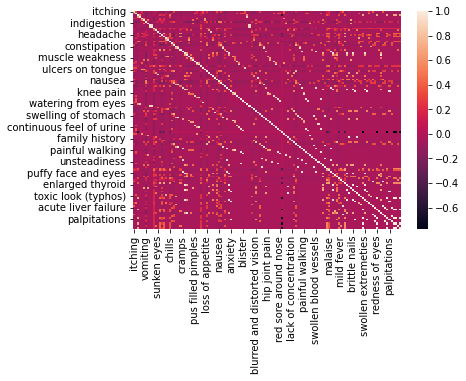

In [159]:
sns.heatmap(corr)

In [160]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.6:
            if columns[j]:
                columns[j] = False
selected_columns = features.columns[columns]
features = features[selected_columns]

In [161]:
features

,itching,skin rash,continuous sneezing,stomach pain,acidity,vomiting,indigestion,muscle wasting,fatigue,weight loss,...,spinning movements,missing,family history,lack of concentration,swelled lymph nodes,fast heart rate,muscle pain,yellow urine,acute liver failure,blood in sputum
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
encoder = LabelEncoder()
encoder.fit(target.tolist())
encoded_target = encoder.transform(target)

In [163]:
encoded_target

array([15, 15, 15, ..., 38, 35, 27])

In [164]:
X_train, X_test , y_train , y_test = train_test_split(features,target,test_size = 0.20)

Train with Naive bayes classifier

In [165]:


from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score

nb_model = MultinomialNB()

nb_model.fit(X_train.values,y_train)

pred = nb_model.predict(X_test.values)

score = accuracy_score(y_test, pred)
print("Accuracy score for Naive Bayes Classifier is {}%".format(score*100))
cross_val = cross_val_score(nb_model,X_train.values,y_train,cv=5).mean()
print("cross validation score is {}%".format(cross_val))

Accuracy score for Naive Bayes Classifier is 99.6951219512195%
cross validation score is 0.9964425080141126%


F1-score% = 99.66104488412638 | Accuracy% = 99.6951219512195


<AxesSubplot:>

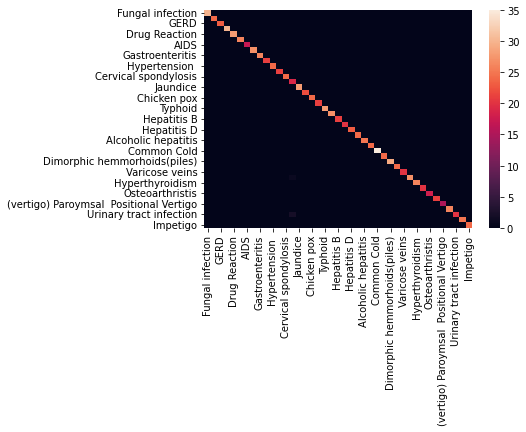

In [166]:
conf_mat = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(conf_mat, index=pre_process['disease'].unique(), columns=pre_process['disease'].unique())
print('F1-score% =', f1_score(y_test, pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred)*100)
sns.heatmap(df_cm)

In [167]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train.values, y_train)
 
# performing predictions on the test dataset
pred = clf.predict(X_test.values)
score = accuracy_score(y_test, pred)
print("Accuracy score for random forest Classifier is {}%".format(score*100))
cross_val = cross_val_score(clf,X_train.values,y_train,cv=5).mean()
print("cross validation score is {}%".format(cross_val))

Accuracy score for random forest Classifier is 99.79674796747967%
cross validation score is 0.997459026438509%


F1-score% = 99.7836899851746 | Accuracy% = 99.79674796747967


<AxesSubplot:>

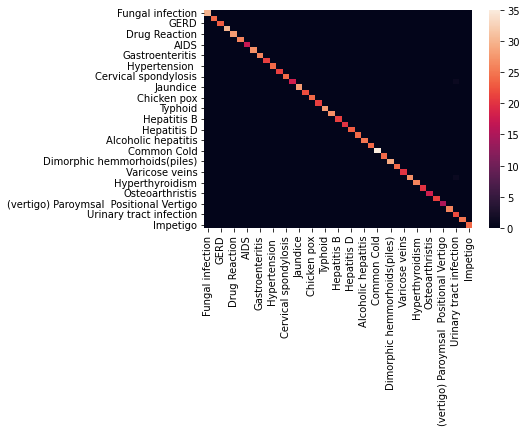

In [168]:
conf_mat = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(conf_mat, index=pre_process['disease'].unique(), columns=pre_process['disease'].unique())
print('F1-score% =', f1_score(y_test, pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred)*100)
sns.heatmap(df_cm)

In [169]:
import pickle
with open('..//models//random_forest','wb') as f:
    pickle.dump(clf,f)
with open('..//models//nb', 'wb') as f:
    pickle.dump(nb_model,f)

In [170]:
disease = clf.classes_
dictionary = dict(zip(disease,range(len(disease))))
col = features.columns
symptoms = ['itching', 'skin rash' , 'vomiting']
li = [0]*len(col)
col_dict = dict(zip(col,range(len(col))))
for i in symptoms:
    li[col_dict[i]] = 1
prediction = nb_model.predict([li])
pred_probablity = nb_model.predict_proba([li])
print(prediction)
print(pred_probablity)
print(pred_probablity[0][dictionary[prediction[0]]])

['Fungal infection']
[[1.63338925e-03 1.05268851e-04 9.60661624e-03 4.61352758e-03
  1.18586809e-04 1.03075750e-04 1.52177229e-05 5.26020336e-05
  4.52746664e-02 1.41061403e-01 6.39960662e-06 1.87394871e-02
  2.69913362e-05 2.49973629e-04 2.32786943e-01 4.18630267e-01
  2.44861321e-03 4.40801129e-03 4.74320111e-03 9.96895445e-04
  1.54925821e-05 9.49270089e-04 4.75647536e-04 2.81339660e-05
  1.06922475e-05 6.83114754e-04 3.45583486e-05 4.79614602e-03
  9.11834143e-02 4.84689920e-04 1.54240896e-05 2.85722908e-04
  4.71096645e-03 4.66410290e-03 6.55791375e-06 4.32074655e-03
  1.92540961e-04 4.73831341e-04 2.78069751e-04 1.04172301e-04
  6.65569314e-04]]
0.4186302667481762


In [171]:
pred = clf.predict([li])
pred_probablity = clf.predict_proba([li])
print(pred)
print(pred_probablity)
print(pred_probablity[0][dictionary[pred[0]]])

['Fungal infection']
[[0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.4 0.1 0.1
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.1 0.  0.  0.
  0.  0.  0.  0.  0. ]]
0.4
